## Import the libraries

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
if not os.path.isdir('models'):
    os.mkdir('models')

print('TensorFlow Version:',tf.__version__)
print("Is using GUP ?",tf.test.is_gpu_available())

TensorFlow Version: 2.2.0
Is using GUP ? False


## Preprocess Data

In [ ]:
def get_three_classes(x,y):
  indices_0, _ =np.where(y==0.)
  indices_1, _ =np.where(y==1.)
  indices_2, _ =np.where(y==2.)
  indices = np.concatenate([indices_0,indices_1,indices_2],axis=0)
  x=x[indices]
  y=y[indices]
  count = x.shape[0]
  indices=np.random.choice(range(count),count,replace=False)
  x=x[indices]
  y=y[indices]
  y=tf.keras.utils.to_categorical(y)
  return x,y

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train,y_train =get_three_classes(x_train,y_train)
x_test,y_test = get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


Visulize Example

In [ ]:
class_name = ['aeroplane','car','bird']
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False)
  x=x[indices]
  y=y[indices]
  p=p[indices]
  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col='green'if np.argmax(y[i]) == np.argmax([p[i]]) else'red'
    plt.xlabel(class_name[np.argmax(p[i])],color=col)


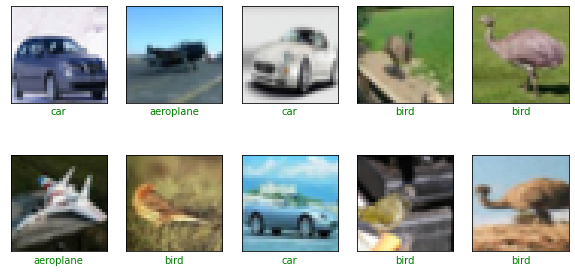

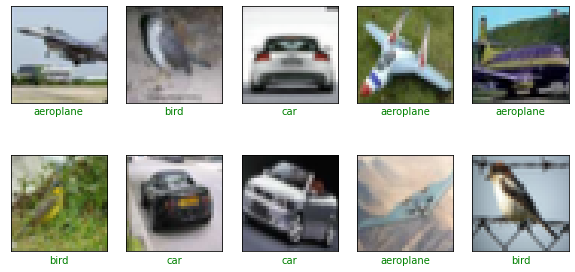

In [ ]:
show_random_examples(x_train ,y_train ,y_train)
show_random_examples(x_test ,y_test ,y_test)

## Create Model

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input
from tensorflow.keras.layers import Dense
def create_model():

  def add_conv_block(model,num_filers):
    model.add(Conv2D(num_filers,3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filers,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))
  model=add_conv_block(model,64)
  model =add_conv_block(model,128)
  model.add(Flatten())
  model.add(Dense(3,activation='softmax'))
  model.compile(
      loss='Categorical_Crossentorpy',
      optimizer='adam',metrics=['accuracy']

  )
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 128)      

## Train the Model

In [ ]:
h = model.fit(x_train/255., y_train, validation_data=(x_test/255. , y_test ),epochs=10,batch_size=128,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',save_best_only=True,save_weights_only=False,monitor='val_accuracy') ] )

Epoch 1/10


ValueError: ignored

In [ ]:
accs = h.history['accuracy']
val_accs=h.history['val_accuracy']
#range(10) or range(len(accs))
plt.plot(range(10),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.show()



NameError: ignored

In [ ]:
model = tf.keras.models.load_model('models/model_0.880.h5')
preds = model.predict(x_test/255.)
show_random_examples(x_test, y_test,preds)

OSError: ignored